<a href="https://colab.research.google.com/github/aalling93/10-semester/blob/master/Klima/lek3/opg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lec 3 

Working with copenhagen tide gauge – long term sea level change data

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; 
import scipy.io
%matplotlib inline
sns.set()
#importing data set. The delimiters are both ' ' and '  '. Therefore adding the 'n', 'nn' just as placeholders for reading the data.
data = pd.read_csv("cph.dat", delimiter=' ',names=['year','n','value','sea_level','nn','nnn']);
#removing offset.
data['MSL'] = data.sea_level-7000;

In [0]:
#removing the columns that arent used.
data.drop(columns=['n', 'value','nn','nnn']);

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:2897: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


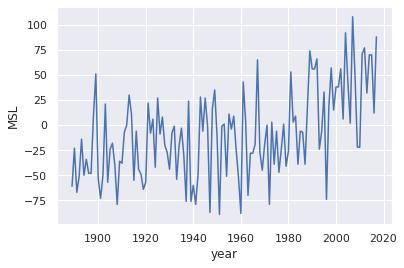

In [0]:
#plotting the data, just to see it.
ax = sns.lineplot(x=data.year,y=data.MSL);

Calculating trends..
Firstly for entire period, then for 30 years. and lastly for 2,5,10,20 and years.

In [0]:
#calculating for all
a = np.polyfit(data['year'][:][:], data['MSL'][:][:], 1)[0]
b = np.polyfit(data['year'][:][:], data['MSL'][:][:], 1)[1]  
#calculating for 30 years
a30 = np.polyfit(data.tail(30)['year'][:][:], data.tail(30)['MSL'][:][:], 1)[0]
b30 = np.polyfit(data.tail(30)['year'][:][:], data.tail(30)['MSL'][:][:], 1)[1] 
#making the periods, and calculating for them. (since this was a seperate exercise, it's done like this)
period = [2,5,10,20,30];
ap = np.zeros(np.size(period))
bp = np.zeros(np.size(period))
d=0
for i in (period):
  ap[d] = np.polyfit(data.tail(i)['year'][:][:], data.tail(i)['MSL'][:][:], 1)[0]
  bp[d] = np.polyfit(data.tail(i)['year'][:][:], data.tail(i)['MSL'][:][:], 1)[1] 
  d=d+1
#
print('trend for 2,5,10,20 and 30 years',ap)
print('trend for entire period: ',round(a, 2),'mm/y')

trend for 2,5,10,20 and 30 years [76.          5.4         6.06666667  0.90676692  0.93659622]
trend for entire period:  0.59 mm/y


Illustrating trend

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:2897: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:2897: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


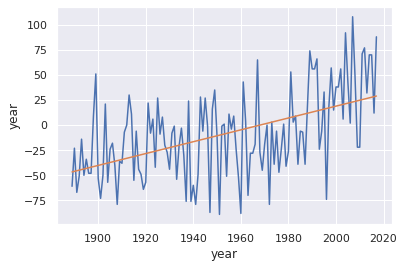

In [0]:
ax = sns.lineplot(x=data.year,y=data.MSL);
ax = sns.lineplot(x=data.year,y=a*data.year+b);

In [0]:
a_periods= np.zeros(len(data['year']))
count = np.zeros(len(data['year']))
for i in range(1,len(a_periods+1)):
  a_periods[i] = np.polyfit(data.tail(i)['year'][:][:], data.tail(i)['MSL'][:][:], 1)[0]
  count[i] = i #for plotting

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


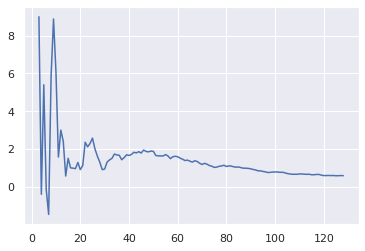

In [0]:
#Plot trend as function of “period”
#taking from number 3, since others are distubing the plot 
ax = sns.lineplot(x=count[3:],y=a_periods[3:]);

Seeing this, you need quite a lot of years to make the tred... There's not a nice L-curve but around 100

calculating acceleration for 2,5,10,20,30,129 years

In [0]:
#calculating the acceleration
period = [2,5,10,20,30,129];
ap2 = np.zeros(np.size(period))
bp2 = np.zeros(np.size(period))
d=0
for i in (period):
  ap2[d] = np.polyfit(data.tail(i)['year'][:][:], data.tail(i)['MSL'][:][:], 2)[0]
  bp2[d] = np.polyfit(data.tail(i)['year'][:][:], data.tail(i)['MSL'][:][:], 2)[1] 
  d=d+1

print('acceleration for 2,5,10,20,30 years and entire period is: ',ap2,'mm^2/y \n')

acceleration for 2,5,10,20,30 years and entire period is:  [ 0.01884248  1.28571429 -0.39772727  0.16404648  0.11545567  0.00827183] mm^2/y 



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


## Ex 2

In [0]:
#importing the data using Scipy.io.loadmat
mat = scipy.io.loadmat('SatAltim26y.mat')
#The data in is a dict format. Loading the data as float.
SatDat = mat.get("SatDat", "");
lat = mat.get("lat", "");
lon =  mat.get("lon", "");
time =mat.get("time", "");
time = time.flatten()

def stats(satdat,time,plot=True):
    ''' 
    calculating stats for altimeter data.. Just easier to do it this way
    '''
    avg = np.nanmean(SatDat, axis=(0,1))   
    a1 = np.polyfit(time,avg, 1)[0]
    b1 = np.polyfit(time,avg, 1)[1]  
    #acceleration
    a2 = np.polyfit(time,avg, 2)[0]
    b2 = np.polyfit(time,avg, 2)[1]  
    c2 = np.polyfit(time,avg, 3)[2]  
    #running acceleration
    a_60 = np.zeros(np.size(time))
    b_60 = np.zeros(np.size(time))
    for i in range(1,np.size(time)-1):
          a_60[i] = np.polyfit(time[i-1:i+1][:],avg[i-1:i+1][:], 1)[0]
          b_60[i] = np.polyfit(time[i-1:i+1][:],avg[i-1:i+1][:], 1)[1]
          a_60[a_60== 0] = np.nan
          b_60[b_60== 0] = np.nan

    if plot==True:
        #plotting the mean and trend.
        ax = sns.scatterplot(x=time,y=avg*1000);
        ax = sns.lineplot(x=time,y=(a1*time+b1)*1000);
        ax = sns.lineplot(x=time,y=(a_60*time+b_60)*1000);
        plt.legend(loc='upper left', labels=['trend','60 smoothing','averaged data'])
        plt.show(ax)

    stats = [a1,b1,a2,b2,c2]   
    return stats,a_60,b_60

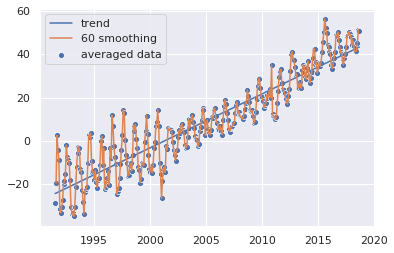

Trend:  0.0025 mm/y. Acceleration:  4.8e-05 mm^2/y


In [0]:
data,a_60,b_60 = stats(SatDat,time,plot=True)
print('Trend: ',round(data[0],4),'mm/y. Acceleration: ',round(data[2],6),'mm^2/y')

In [0]:
#calculating rise in 2025 vs. 2020 for the fun of it without acceleration
y_2025 = ((data[0]*2025+data[1])-(data[0]*2020+data[1]))*1000;
print('I.e. from 2020 to 2025 its gonna rise: ',round(y_2025,2),'mm   if NO acceleration is present')

I.e. from 2020 to 2025 its gonna rise:  1.25 mm   if NO acceleration is present


## 2B

In [0]:
'''
SLCgrid = np.zeros((len(SatDat[:,1,1]),len(SatDat[1,:,1])))
for i in range(len(SatDat[:,1,1])):
  for j in range(len(SatDat[1,:,1])):
    SLCgrid[i,j] = np.nanmean(SatDat[i,j,:])*20 
    SLCgrid[np.isnan(SLCgrid)] = 0 # removing nan value..
    

for i in range(len(SatDat[1,1,:])):
    plt.imshow(SatDat[:,:,i])
    plt.colorbar()
    plt.show()

'''

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


'\nfor i in range(len(SatDat[1,1,:])):\n    plt.imshow(SatDat[:,:,i])\n    plt.colorbar()\n    plt.show()\n\n'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


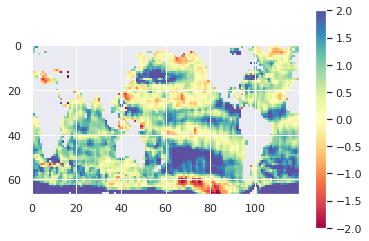

In [0]:
avg_s = np.nanmean(SatDat, axis=2)*100
plt.imshow(avg_s)
plt.colorbar()
plt.set_cmap('Spectral')
plt.clim(-2,2)
plt.show()

## Frederica for fun

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; 
%matplotlib inline
sns.set()
data_f = pd.read_csv("frederica.dat",delimiter=';', names=['year','rsl','aa','n']) 
data_f['MSL'] = data_f.rsl-7000

#cleaning up the data
delete_row = data_f[data_f.iloc[:,1]==-99999].index
data_f = data_f.drop(delete_row)

In [0]:
data_f.head()

,year,rsl,aa,n,MSL
0,1889.6250,7005,0,0,5
1,1889.7083,7027,0,0,27
2,1889.7917,7013,0,0,13
3,1889.8750,6949,0,0,-51
4,1889.9583,6897,0,0,-103


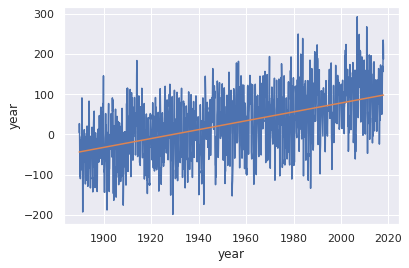

In [0]:
#calculating for all
a_all = np.polyfit(data_f['year'][:][:], data_f['MSL'][:][:], 1)[0]
b_all = np.polyfit(data_f['year'][:][:], data_f['MSL'][:][:], 1)[1]  

ax = sns.lineplot(x=data_f.year,y=data_f.MSL);
ax = sns.lineplot(x=data_f.year,y=a_all*data_f.year+b_all);


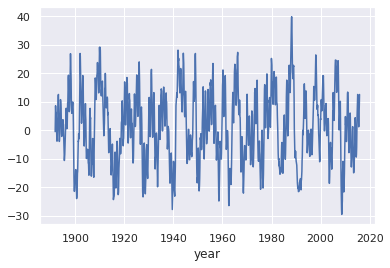

In [0]:
#making a RUNNING mean to illustrate
a = np.zeros(np.size(data_f['year']))
b = np.zeros(np.size(data_f['year']))

for i in range(26,np.size(data_f['MSL'])-25):
    a[i] = np.polyfit(data_f['year'][i-24:i+24][:], data_f['MSL'][i-24:i+24][:], 1)[0]
    b[i] = np.polyfit(data_f['year'][i-24:i+24][:], data_f['MSL'][i-24:i+24][:], 1)[1]

a[a== 0] = np.nan
ax = sns.lineplot(x=data_f.year,y=a);